<a href="https://colab.research.google.com/github/seemazml/AgricultureCropPrediction/blob/main/Agriculture_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go 
#from sklearn.metrics import classification_report
#from sklearn import metrics
#from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the crop production data for Karnataka
yield_df = pd.read_csv('/content/gdrive/MyDrive/CRP_DATASET/Kar_Crop_Data.csv')

In [ ]:
yield_df.shape

(21122, 7)

In [ ]:
yield_df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154,2602.0
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855,52375.0
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71,61.0
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225,22129.0
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368,7734.0
5,Karnataka,BAGALKOT,1998,Kharif,Horse-gram,3372,1156.0
6,Karnataka,BAGALKOT,1998,Kharif,Jowar,12363,24855.0
7,Karnataka,BAGALKOT,1998,Kharif,Maize,30630,92831.0
8,Karnataka,BAGALKOT,1998,Kharif,Moong(Green Gram),13872,1147.0
9,Karnataka,BAGALKOT,1998,Kharif,Niger seed,310,47.0


In [ ]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21122 entries, 0 to 21121
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     21122 non-null  object 
 1   District_Name  21122 non-null  object 
 2   Crop_Year      21122 non-null  int64  
 3   Season         21122 non-null  object 
 4   Crop           21122 non-null  object 
 5   Area           21122 non-null  int64  
 6   Production     21079 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
# Finding the number of null values in the dataset
yield_df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       43
dtype: int64

In [ ]:
# Imputing Null values using the Mean for 'Production'
yield_df["Production"] = yield_df["Production"].replace(np.NaN,yield_df["Production"].mean())

In [ ]:
# Finding the number of null values in the dataset after imputation
yield_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
# Check for duplicates, retain the first instance of the row and delete the rest
bool_series = yield_df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after keeping only the first instance of the duplicate rows:')
yield_df[~bool_series]

Boolean series:
0        False
1        False
2        False
3        False
4        False
         ...  
21117    False
21118    False
21119    False
21120    False
21121    False
Length: 21122, dtype: bool


DataFrame after keeping only the first instance of the duplicate rows:


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154,2602.000000
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855,52375.000000
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71,61.000000
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225,22129.000000
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368,7734.000000
...,...,...,...,...,...,...,...
21117,Karnataka,YADGIR,2014,Summer,Rice,15205,35029.000000
21118,Karnataka,YADGIR,2014,Summer,Sunflower,14,5.000000
21119,Karnataka,YADGIR,2014,Whole Year,Coconut,168,1499.000000
21120,Karnataka,YADGIR,2014,Whole Year,Coriander,1,40961.611636


There are no duplicates in the dataset

In [ ]:
# Check the unique District Names names
yield_df['District_Name'].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [ ]:
# Check the unique Crop Year names
yield_df['Crop_Year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 1997])

No high correlation between variables

# **Exploratory Data Analysis**

## **Univariate Analysis**

In [ ]:
# Check 'Districts' of Karnataka
yield_df.District_Name.unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [ ]:
yield_df.District_Name.nunique()

30

In [ ]:
yield_df.District_Name.value_counts()

TUMKUR             936
BELGAUM            925
HASSAN             895
BELLARY            887
DAVANGERE          886
HAVERI             870
CHAMARAJANAGAR     844
CHITRADURGA        840
GULBARGA           833
MYSORE             832
SHIMOGA            825
DHARWAD            825
CHIKMAGALUR        820
BANGALORE RURAL    794
BIDAR              781
MANDYA             780
GADAG              755
BAGALKOT           733
BIJAPUR            699
RAICHUR            691
KOPPAL             678
UTTAR KANNAD       677
BENGALURU URBAN    672
KOLAR              629
KODAGU             423
UDUPI              376
DAKSHIN KANNAD     366
CHIKBALLAPUR       328
RAMANAGARA         310
YADGIR             212
Name: District_Name, dtype: int64

The data is more for the districts of Tumkur, Belgaum and Hassan, lesser data available for Yadgir, Ramanagara and Chikballapur

In [ ]:
# Check for 'Crop Year'

print(yield_df.Crop_Year.nunique())
print(yield_df.Crop_Year.min())
print(yield_df.Crop_Year.max())
print(yield_df.Crop_Year.value_counts())

18
1997
2014
2011    1398
2010    1393
2002    1360
2012    1329
2013    1329
2014    1312
2003    1267
2005    1253
2009    1243
2007    1240
2008    1238
2006    1106
2000    1086
2004    1074
1999    1060
2001     986
1998     974
1997     474
Name: Crop_Year, dtype: int64


The data is available for 18 years between 1997 and 2014 with the highest data being available for 2011 and 2010.

In [ ]:
# Check for 'Season'

print(yield_df.Season.unique())
print(yield_df.Season.nunique())
print(yield_df.Season.value_counts())

['Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year ']
4
Kharif         8065
Rabi           5577
Whole Year     4983
Summer         2497
Name: Season, dtype: int64


4 different seasons are available in the dataset. Kharif crops have the most records in this dataset.

In [ ]:
# Check for 'Crop'

print(yield_df.Crop.unique())
print(yield_df.Crop.nunique())
print(yield_df.Crop.value_counts().head(10))

['Arhar/Tur' 'Bajra' 'Castor seed' 'Cotton(lint)' 'Groundnut' 'Horse-gram'
 'Jowar' 'Maize' 'Moong(Green Gram)' 'Niger seed' 'Onion'
 'Rapeseed &Mustard' 'Rice' 'Sesamum' 'Soyabean' 'Sunflower' 'Gram'
 'Linseed' 'Safflower' 'Wheat' 'Arecanut' 'Coconut ' 'Coriander'
 'Dry chillies' 'Garlic' 'Turmeric' 'Mesta' 'Other Kharif pulses'
 'Small millets' 'Other  Rabi pulses' 'Banana' 'Sugarcane' 'Sweet potato'
 'Sannhamp' 'Arcanut (Processed)' 'Atcanut (Raw)' 'Brinjal' 'Citrus Fruit'
 'Grapes' 'Mango' 'Other Fresh Fruits' 'Papaya' 'Pome Fruit' 'Tomato'
 'Urad' 'Cashewnut' 'Tobacco' 'Cowpea(Lobia)' 'Black pepper' 'Dry ginger'
 'Paddy' 'Peas & beans (Pulses)' 'Potato' 'Ragi' 'Tapioca'
 'Beans & Mutter(Vegetable)' 'Cashewnut Processed' 'Cashewnut Raw'
 'Cardamom']
59
Maize                1331
Rice                 1195
Sunflower            1150
Jowar                 962
Dry chillies          949
Horse-gram            907
Groundnut             905
Ragi                  838
Onion                 837

The dataset has 59 different types of crops. Maize has the highest no of data.

In [ ]:
# Check for 'area under cultivation'

print(yield_df.Area.nunique())
print(yield_df.Area.max())
print(yield_df.Area.value_counts().head(10))

8569
510692
1     252
2     249
4     193
5     187
3     166
10    144
6     140
15    130
8     116
7     107
Name: Area, dtype: int64


In [ ]:
# Check for 'Production'

yield_df.Production.describe()

count    2.112200e+04
mean     4.096161e+04
std      4.265591e+05
min      0.000000e+00
25%      1.160000e+02
50%      9.340000e+02
75%      7.473750e+03
max      1.802747e+07
Name: Production, dtype: float64

In [ ]:
yield_df.Production.max()

18027470.0

In [ ]:
yield_df.Production.value_counts(ascending = False)

1.0         252
2.0         216
3.0         178
5.0         177
4.0         157
           ... 
8971.0        1
2500.0        1
113629.0      1
48505.0       1
1499.0        1
Name: Production, Length: 9295, dtype: int64

The 'Area' and 'Production' variables are skewed. Lets look at the box plot to check outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f693c92cc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f693c933c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f693c938cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f693c938790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f693c933290>,
  <matplotlib.lines.Line2D at 0x7f693c933750>]}

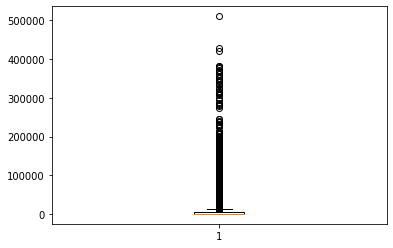

In [ ]:
plt.boxplot(yield_df.Area)

{'boxes': [<matplotlib.lines.Line2D at 0x7f693a6bfd10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f693a6c7d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f693a6cedd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f693a6ce890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f693a6c7310>,
  <matplotlib.lines.Line2D at 0x7f693a6c7850>]}

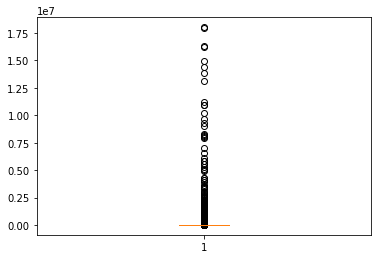

In [ ]:
plt.boxplot(yield_df.Production)

# **Segmented Univariate Analysis**



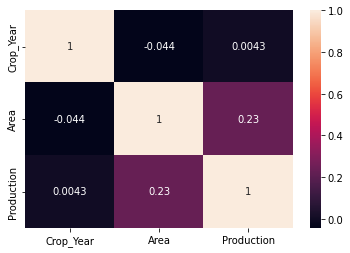

In [ ]:
# check for correlation between variables 
sns.heatmap(yield_df.corr(),annot=True);

**District wise crop production**

In [ ]:
dist_prd = yield_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
dist_prd

,District_Name,Production
8,CHIKBALLAPUR,2.821539e+06
4,BENGALURU URBAN,2.957851e+06
29,YADGIR,3.175135e+06
18,KODAGU,3.663884e+06
24,RAMANAGARA,3.735962e+06
27,UDUPI,6.151292e+06
19,KOLAR,8.297375e+06
1,BANGALORE RURAL,8.637291e+06
28,UTTAR KANNAD,9.188888e+06
14,GADAG,9.258871e+06


Text(0.5, 1.0, 'District wise Production')

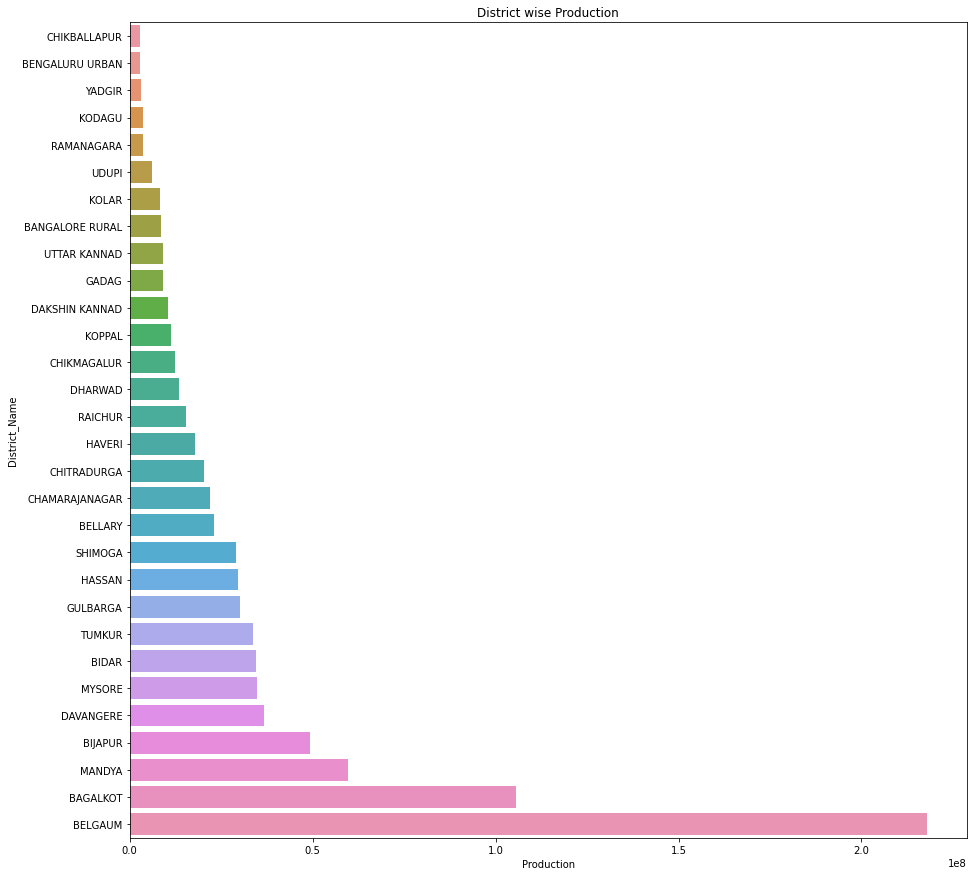

In [ ]:
plt.figure(figsize= (15,15))
sns.barplot(x = dist_prd['Production'],y= dist_prd["District_Name"]);
plt.title('District wise Production')

**Belgaum** has the highest production of crops while **Chikballapur** has the least

**District wise Area of Cultivation**

Text(0.5, 1.0, 'District wise Area of Cultivation')

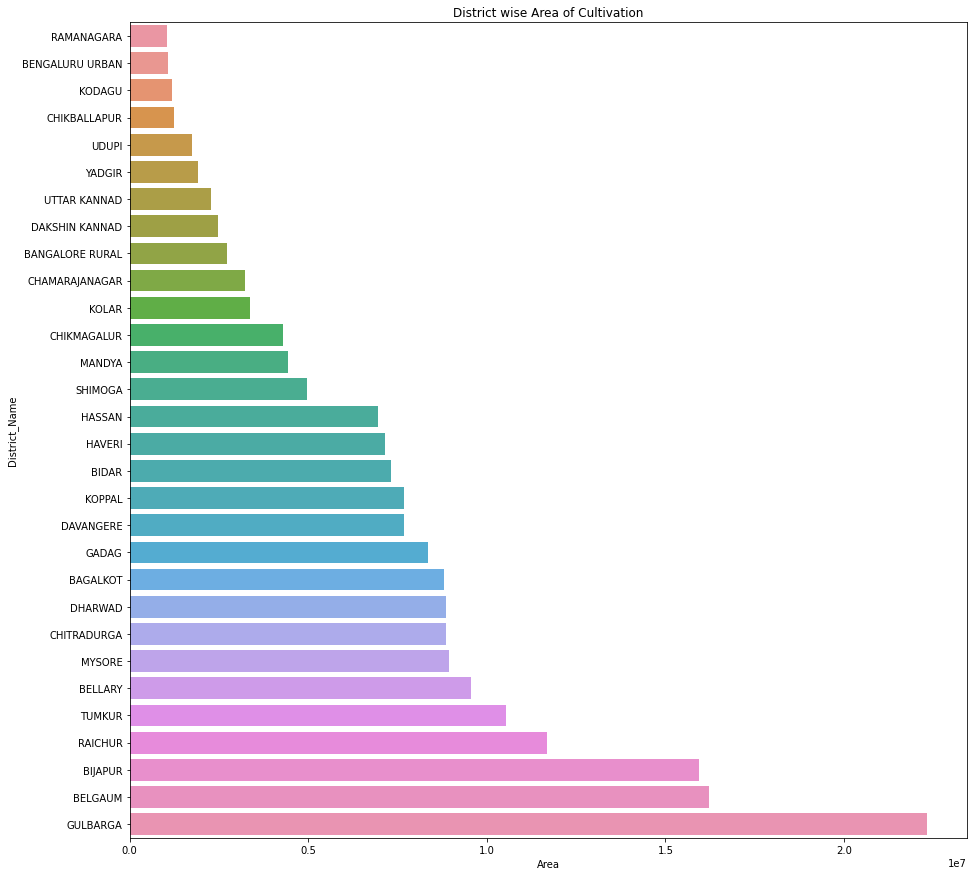

In [ ]:
dist_area = yield_df.groupby(by='District_Name')['Area'].sum().reset_index().sort_values(by = 'Area')

plt.figure(figsize= (15,15))
sns.barplot(x = dist_area['Area'],y= dist_area["District_Name"]);
plt.title('District wise Area of Cultivation')

**Gulbarga** district followed by **Belgaum** have the largest crop area whereas **Ramanagara** and **Bengaluru Urban** have the smallest

It is better if we look at Production per unit area to get an idea of crop production

**District wise Crop Production per unit area**

Text(0.5, 1.0, 'District wise Production per unit Area')

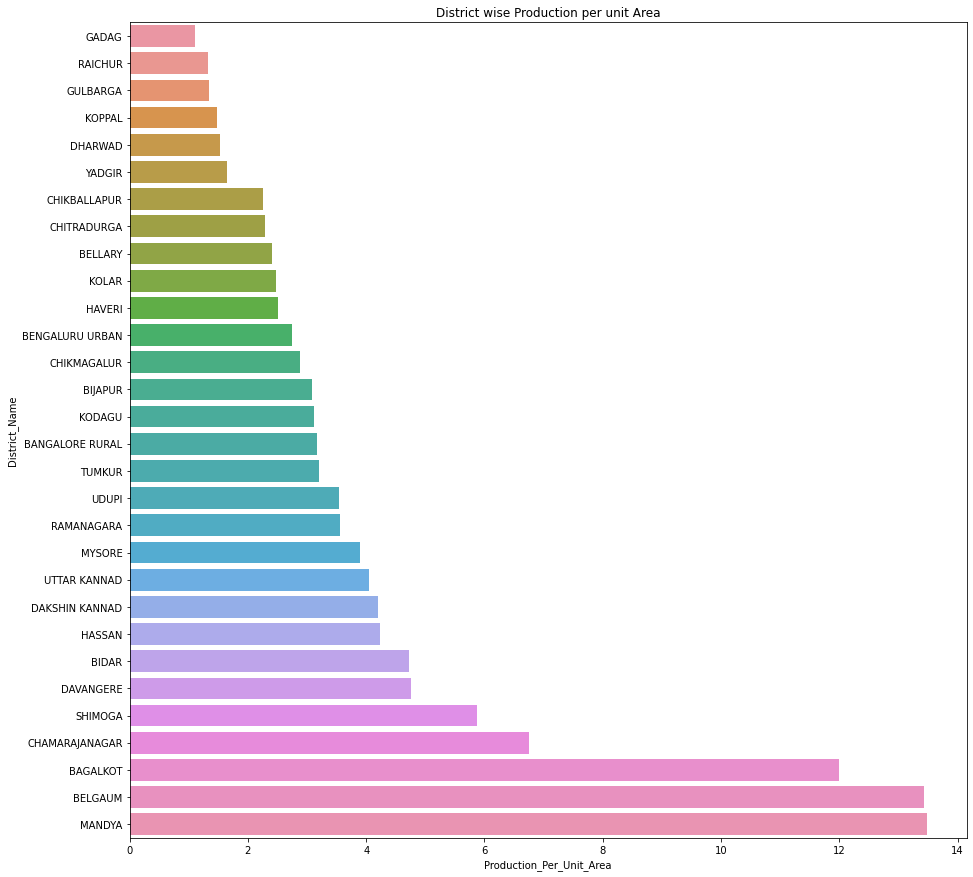

In [ ]:
dist_unitarea = yield_df.groupby('District_Name')['Area', 'Production'].sum().reset_index()

dist_unitarea['Production_Per_Unit_Area'] = dist_unitarea['Production']/dist_unitarea['Area']
dist_unitarea = dist_unitarea.sort_values(by = 'Production_Per_Unit_Area')

#px.bar(dist_unitarea, 'District_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )
plt.figure(figsize= (15,15))
sns.barplot(x = dist_unitarea['Production_Per_Unit_Area'],y= dist_unitarea["District_Name"]);
plt.title('District wise Production per unit Area')

**Mandya** and **Belgaum** districts have the highest crop production per unit area
**Gadag** and **Raichur** have the lowest

**Crop wise Production**

Text(0.5, 1.0, 'Crop wise Production')

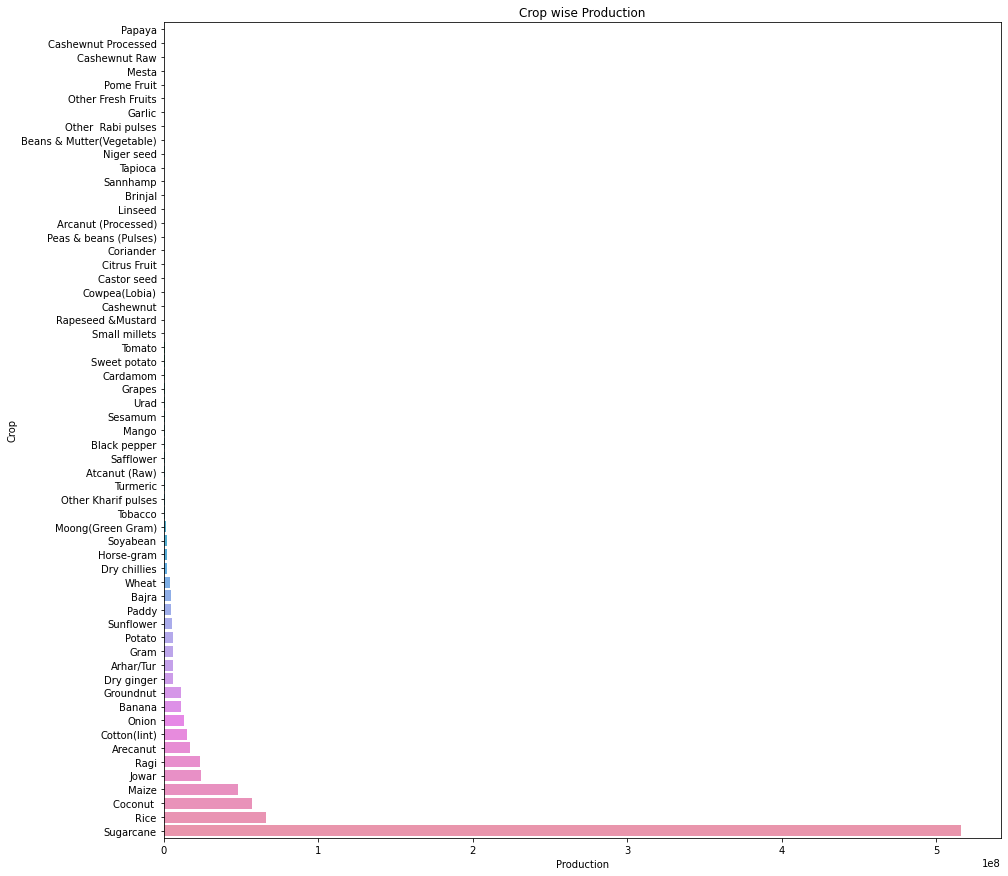

In [ ]:
crp_prd = yield_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
plt.figure(figsize= (15,15))
sns.barplot(x = crp_prd['Production'],y= crp_prd["Crop"]);
plt.title('Crop wise Production')

**Sugarcane** is the highest producing crop in Karnataka

**Crop wise Area of cultivation**

Text(0.5, 1.0, 'Crop wise Area of Cultivation')

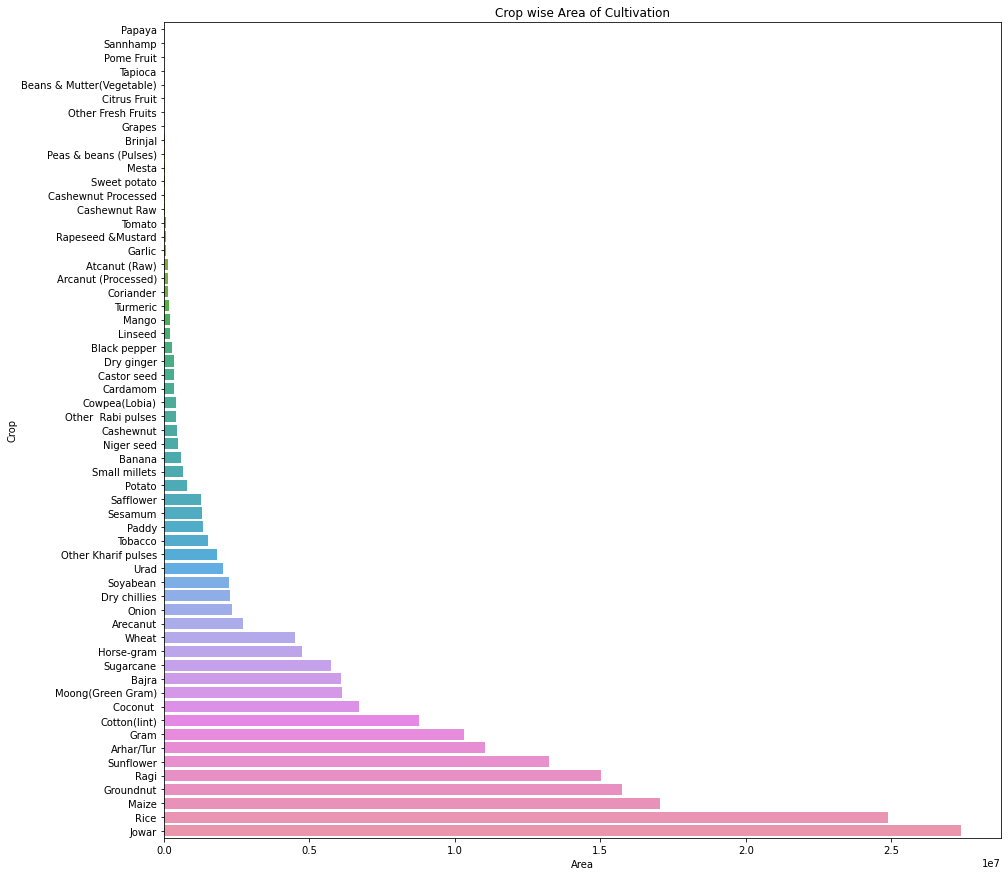

In [ ]:
crp_area = yield_df.groupby(by='Crop')['Area'].sum().reset_index().sort_values(by = 'Area')
plt.figure(figsize= (15,15))
sns.barplot(x = crp_area['Area'],y= crp_area["Crop"]);
plt.title('Crop wise Area of Cultivation')

**Jowar** has the largest area of cultivation followed by **Rice**

**Crop wise production per unit area**

Text(0.5, 1.0, 'Crop wise Production per unit Area')

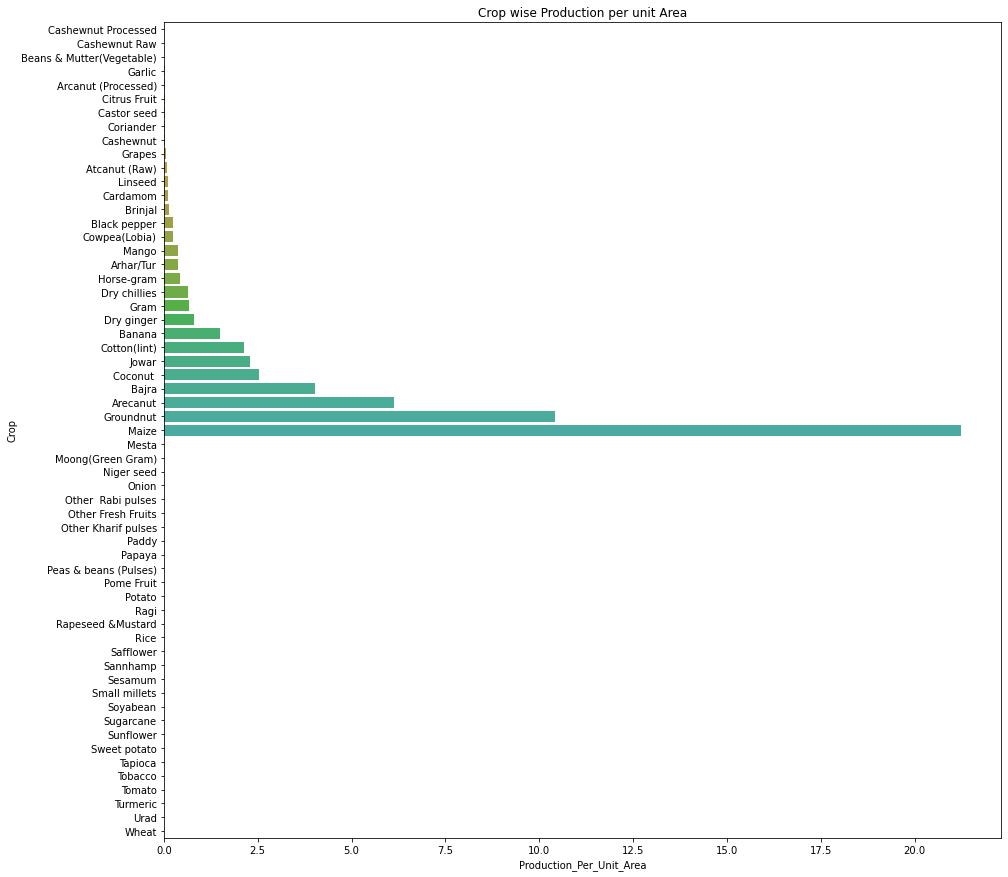

In [ ]:
crp_unitarea = yield_df.groupby('Crop')['Area', 'Production'].sum().reset_index()

crp_unitarea['Production_Per_Unit_Area'] = crp_unitarea['Production']/dist_unitarea['Area']
crp_unitarea = crp_unitarea.sort_values(by = 'Production_Per_Unit_Area')

plt.figure(figsize= (15,15))
sns.barplot(x = crp_unitarea['Production_Per_Unit_Area'],y= crp_unitarea["Crop"]);
plt.title('Crop wise Production per unit Area')

**Maize** has the highest production per unit area

**Year wise Crop Production**

Text(0.5, 1.0, 'Year wise Production')

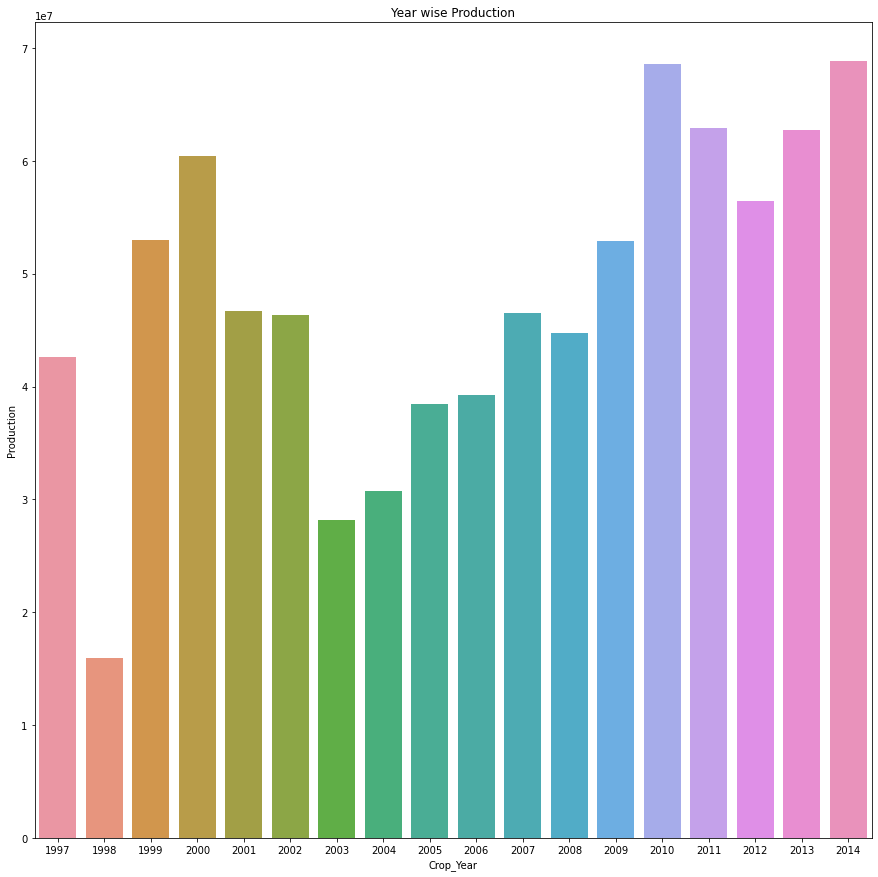

In [ ]:
yr_crp = yield_df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by = 'Production')

plt.figure(figsize= (15,15))
sns.barplot(x = yr_crp['Crop_Year'],y= yr_crp["Production"]);
plt.title('Year wise Production')

2010 and 2014 have the highest crop production

In [ ]:
# Let us find out the highest and lowest crop producing districts

fig= py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Lowest crop producing districts'))

dist_prd = yield_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
dist_prd_tail = dist_prd.tail()
plt1 = go.Bar(x = dist_prd_tail['District_Name'], y = dist_prd_tail['Production'])
#plt1 = sns.barplot(x = dist_prd_tail['District_Name'],y= dist_prd_tail['Production']);

dist_prd_head = dist_prd.head()
plt2 = go.Bar(x = dist_prd_head['District_Name'], y = dist_prd_head['Production'])
#plt2 = sns.barplot(x = dist_prd_head['District_Name'],y= dist_prd_head['Production']);

fig.append_trace(plt1,1,1)
fig.append_trace(plt2,1,2)

fig.show()

del dist_prd_tail,dist_prd_head

The top 3 crop producing districts are - Belgaum, Bagalkot and Mandya.
The bottom 3 crop producing districts are - Chikballapur, Bengaluru urban and Yadgir

**Season wise crop production**

Text(0.5, 1.0, 'Season wise Production')

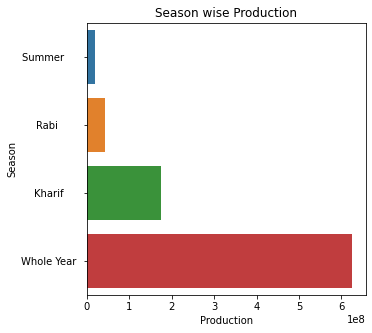

In [ ]:
ssn_prd = yield_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by = 'Production')
plt.figure(figsize= (5,5))
sns.barplot(x = ssn_prd['Production'],y= ssn_prd["Season"]);
plt.title('Season wise Production')

The seasons which show high production values are Whole Year(Annual growing plants) and Kharif crops. It clearly shows these crops heavily dependent on seasonal monsoons.

**Crop with high frequency and when and where is it grown**

In [ ]:
# First, let us find the top 5 crops
yield_df["Crop"].value_counts()[:5]

Maize           1331
Rice            1195
Sunflower       1150
Jowar            962
Dry chillies     949
Name: Crop, dtype: int64

Based on the frequency, Maize is the most grown crop of Karnataka

(1331, 7)


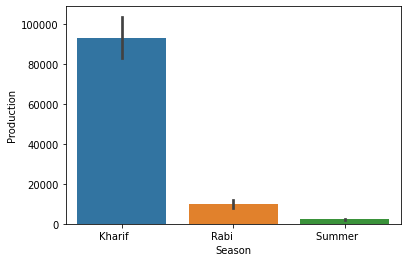

In [ ]:
# Season wise production of Maize
maize_df = yield_df[yield_df["Crop"]=="Maize"]
print(maize_df.shape)

sns.barplot("Season", "Production",data=maize_df);

Maize is produced during the onset of monsoon, which is the Kharif season.

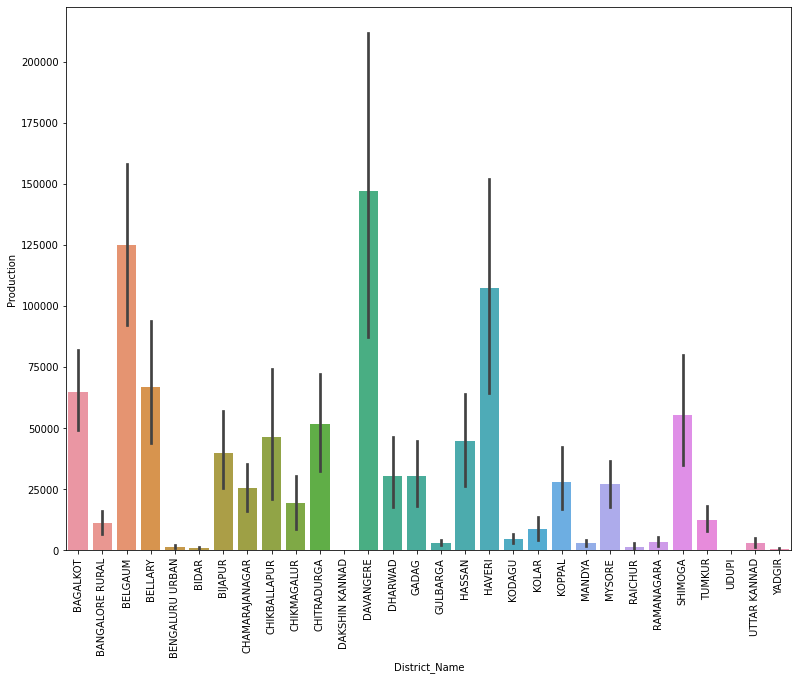

In [ ]:
# Maize producing districts

plt.figure(figsize=(13,10))
sns.barplot("District_Name","Production",data=maize_df)
plt.xticks(rotation=90)
plt.show()

Davangere followed by Belgaum are the highest Maize producers

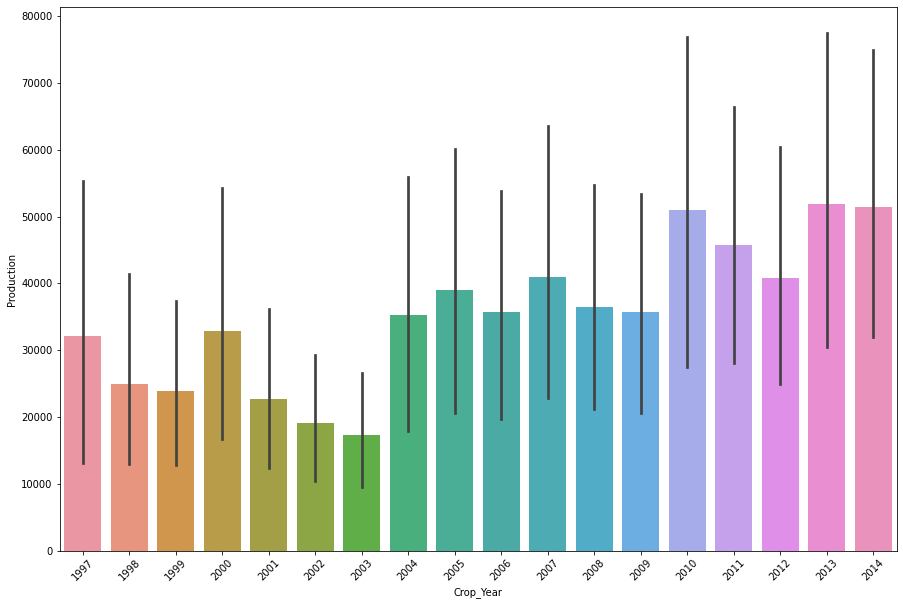

In [ ]:
#Year wise Production of Maize

plt.figure(figsize=(15,10))
sns.barplot("Crop_Year", "Production", data = maize_df)
plt.xticks(rotation=45)
plt.show()

Maize was produced most in 2010, 2013 and 2014

# **Bivariate Analysis**

**Adding a column 'Yield' which is Production per Unit Area**

In [ ]:
# Adding a new column Yield which indicates Production per unit Area. 

yield_df['Yield'] = (yield_df['Production'] / yield_df['Area'])
yield_df.head(10) 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154,2602.0,0.422814
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855,52375.0,1.072050
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71,61.0,0.859155
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225,22129.0,1.453465
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368,7734.0,0.472507
5,Karnataka,BAGALKOT,1998,Kharif,Horse-gram,3372,1156.0,0.342823
6,Karnataka,BAGALKOT,1998,Kharif,Jowar,12363,24855.0,2.010434
7,Karnataka,BAGALKOT,1998,Kharif,Maize,30630,92831.0,3.030722
8,Karnataka,BAGALKOT,1998,Kharif,Moong(Green Gram),13872,1147.0,0.082685
9,Karnataka,BAGALKOT,1998,Kharif,Niger seed,310,47.0,0.151613


Visualizing Numeric variables using scatter plot

In [ ]:
#sns.pairplot(yield_df)
#plt.show()

Vizualizing Categorical variables

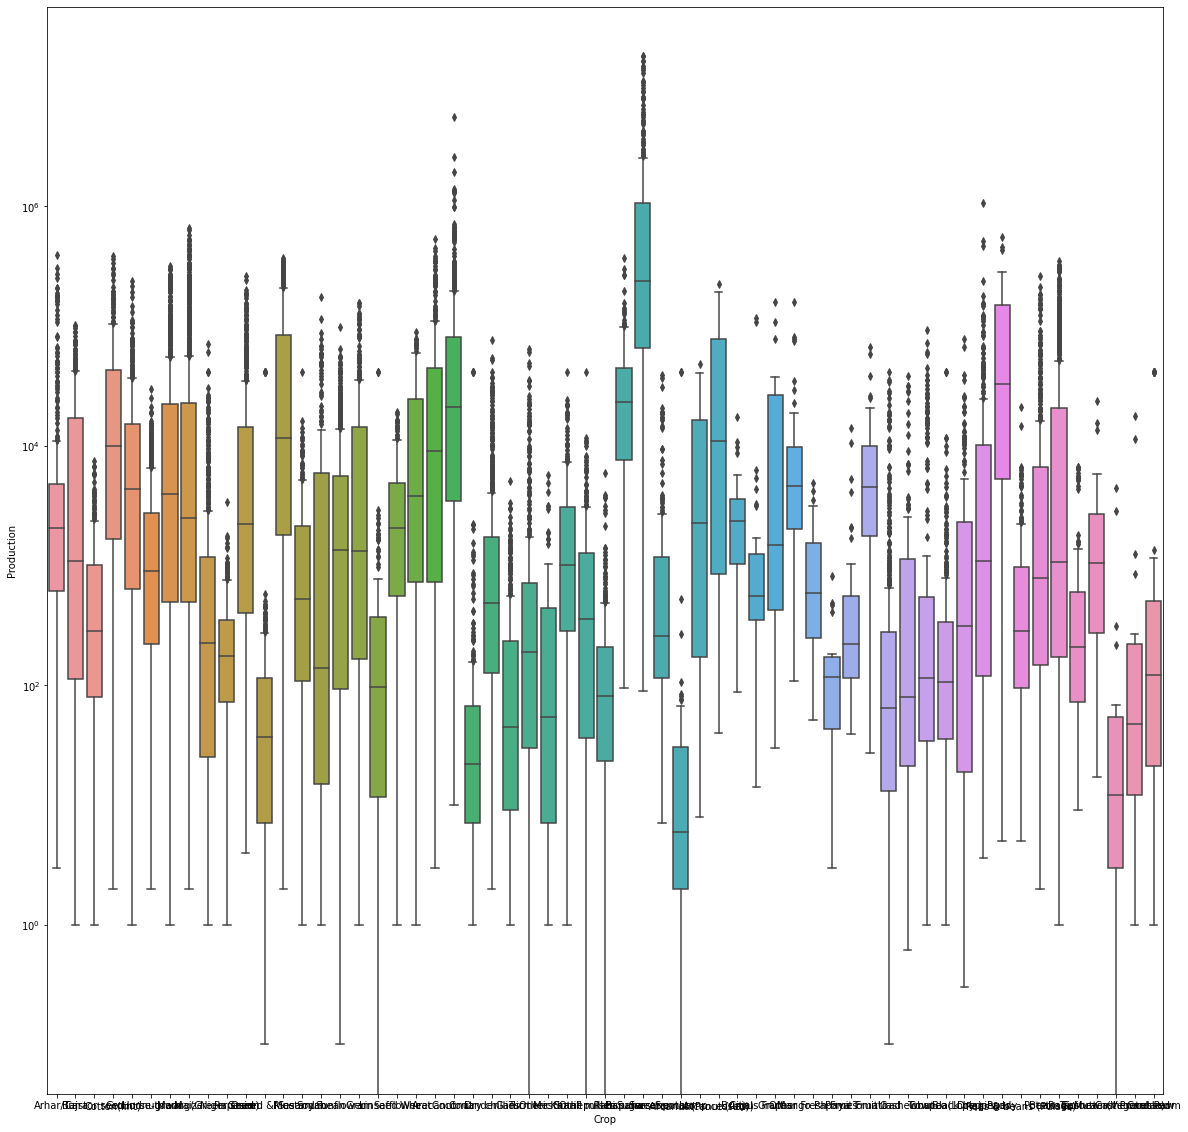

In [ ]:
# boxplot to see distributions of Production across crops
plt.figure(figsize=(20, 20))
sns.boxplot(x='Crop', y='Production', data=yield_df)
plt.yscale('log')
plt.show()

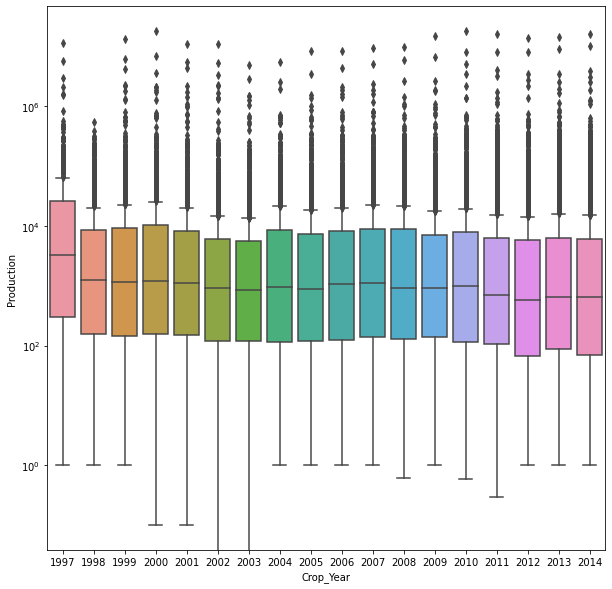

In [ ]:
# boxplot to see distributions of Production across crops
plt.figure(figsize=(10, 10))
sns.boxplot(x='Crop_Year', y='Production', data=yield_df)
plt.yscale('log')
plt.show()

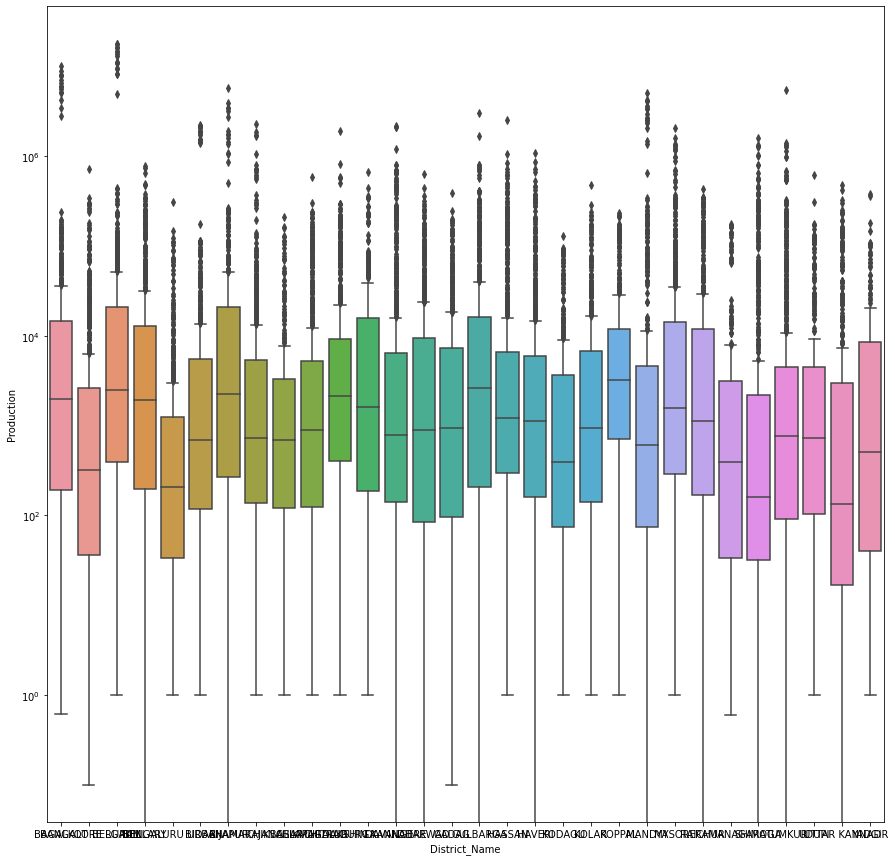

In [ ]:
# boxplot to see distributions of Production across crops
plt.figure(figsize=(15, 15))
sns.boxplot(x='District_Name', y='Production', data=yield_df)
plt.yscale('log')
plt.show()

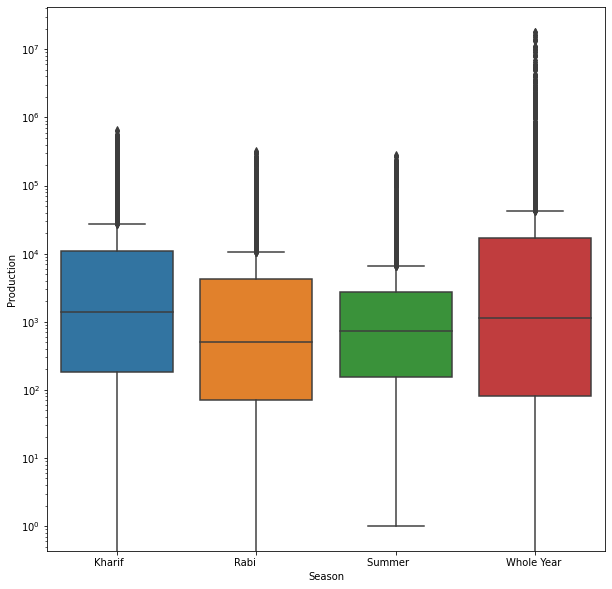

In [ ]:
# boxplot to see distributions of Production across crops
plt.figure(figsize=(10, 10))
sns.boxplot(x='Season', y='Production', data=yield_df)
plt.yscale('log')
plt.show()

In [ ]:
# Dropping unnecessary columns

yield_final = yield_df.drop(['State_Name'], axis = 1)

In [ ]:
yield_final.corr()

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.043502,0.004264,0.025018
Area,-0.043502,1.000000,0.232753,-0.015685
Production,0.004264,0.232753,1.000000,0.003202
Yield,0.025018,-0.015685,0.003202,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

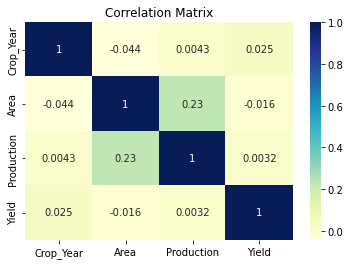

In [ ]:
sns.heatmap(yield_final.corr(), annot =True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')

# **Data Pre-processing**

## **Converting Categorical variables into Numerical**

In [ ]:
df_dummy = pd.get_dummies(yield_final)
print(df_dummy)

       Crop_Year   Area    Production         Yield  District_Name_BAGALKOT  \
0           1998   6154   2602.000000      0.422814                       1   
1           1998  48855  52375.000000      1.072050                       1   
2           1998     71     61.000000      0.859155                       1   
3           1998  15225  22129.000000      1.453465                       1   
4           1998  16368   7734.000000      0.472507                       1   
...          ...    ...           ...           ...                     ...   
21117       2014  15205  35029.000000      2.303782                       0   
21118       2014     14      5.000000      0.357143                       0   
21119       2014    168   1499.000000      8.922619                       0   
21120       2014      1  40961.611636  40961.611636                       0   
21121       2014    862  78614.000000     91.199536                       0   

       District_Name_BANGALORE RURAL  District_Name

In [ ]:
df_dummy.head()

,Crop_Year,Area,Production,Yield,District_Name_BAGALKOT,District_Name_BANGALORE RURAL,District_Name_BELGAUM,District_Name_BELLARY,District_Name_BENGALURU URBAN,District_Name_BIDAR,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Wheat
0,1998,6154,2602.0,0.422814,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1998,48855,52375.0,1.072050,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1998,71,61.0,0.859155,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1998,15225,22129.0,1.453465,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,16368,7734.0,0.472507,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Model Training**

In [ ]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

#create another dataframe to hold sclaed values
df_scaled = df_dummy.copy()

# Create area'Area' and 'Production' column's values as floats
area = df_scaled[['Area']].values.astype(float)
prd = df_scaled[['Production']].values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled_area = min_max_scaler.fit_transform(area)
x_scaled_prd = min_max_scaler.fit_transform(prd)

df_scaled['Area'] = x_scaled_area
df_scaled['Production'] = x_scaled_prd
df_scaled

,Crop_Year,Area,Production,Yield,District_Name_BAGALKOT,District_Name_BANGALORE RURAL,District_Name_BELGAUM,District_Name_BELLARY,District_Name_BENGALURU URBAN,District_Name_BIDAR,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Wheat
0,1998,0.012048,1.443353e-04,0.422814,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1998,0.095663,2.905288e-03,1.072050,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1998,0.000137,3.383725e-06,0.859155,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1998,0.029811,1.227516e-03,1.453465,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,0.032049,4.290119e-04,0.472507,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21117,2014,0.029771,1.943090e-03,2.303782,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21118,2014,0.000025,2.773545e-07,0.357143,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21119,2014,0.000327,8.315088e-05,8.922619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21120,2014,0.000000,2.272177e-03,40961.611636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train-Test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_dummy.drop(["Production","Yield"],axis=1)
X_scaled = df_scaled.drop(["Production","Yield"],axis=1)

In [ ]:
Y = df_dummy["Production"]
Y_scaled = df_scaled["Production"]

In [ ]:
Y

0         2602.000000
1        52375.000000
2           61.000000
3        22129.000000
4         7734.000000
             ...     
21117    35029.000000
21118        5.000000
21119     1499.000000
21120    40961.611636
21121    78614.000000
Name: Production, Length: 21122, dtype: float64

**Train-Test splitting**

In [ ]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state = 100)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, Y_scaled, test_size = 0.25,random_state = 100)

In [ ]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

print("x_train_scaled :",x_train_scaled.shape)
print("x_test_scaled :",x_test_scaled.shape)
print("y_train_scaled :",y_train_scaled.shape)
print("y_test_scaled :",y_test_scaled.shape)

x_train : (15841, 95)
x_test : (5281, 95)
y_train : (15841,)
y_test : (5281,)
x_train_scaled : (15841, 95)
x_test_scaled : (5281, 95)
y_train_scaled : (15841,)
y_test_scaled : (5281,)


**Fitting the Linear Regression Model**

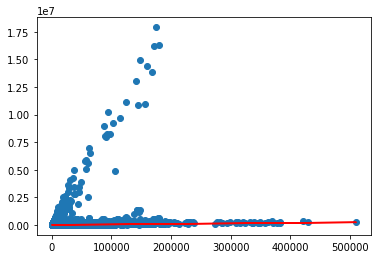

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(x_train.iloc[:, 1], y_train)
plt.plot(x_train.iloc[:, 1], 0.127 + 0.462*x_train.iloc[:, 1], 'r')
plt.show()

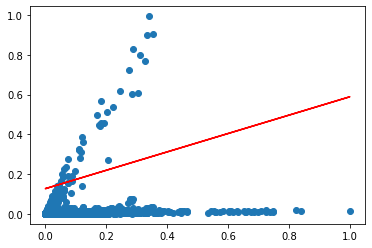

In [ ]:
# Let's visualise the scaled data with a scatter plot and the fitted regression line
plt.scatter(x_train_scaled.iloc[:, 1], y_train_scaled)
plt.plot(x_train_scaled.iloc[:, 1], 0.127 + 0.462*x_train_scaled.iloc[:, 1], 'r')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_pred = reg_model.predict(x_test)

In [ ]:
lr_pred

array([ 15611.46469093, -83386.12663101,  27205.4481242 , ...,
       -73101.04235333, 198049.95974532, -37818.59249427])

**Check for Model Effectiveness**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,lr_pred)

0.17465517306593747

Check Scatter Plot

Text(0.5, 1.0, 'Linear Regression')

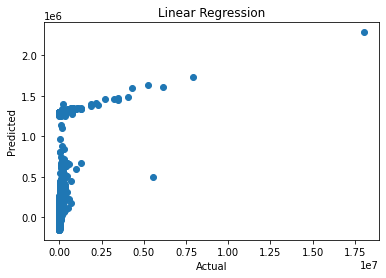

In [ ]:
plt.scatter(y_test,lr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Let us check the Errors

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,lr_pred))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,lr_pred))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

Mean Absolute Error is: 75767.87292127009
Mean Squared Error is: 94291829167.63565
Root Mean Squared Error is: 307069.74642194185


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae_lr = mean_absolute_error(y_test,lr_pred)
mae_lr

75767.87292127009

**Fit model on Scaled Train and Test**

In [ ]:
reg_model_scaled = LinearRegression()
reg_model_scaled.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
lr_pred_scaled = reg_model.predict(x_test_scaled)

In [ ]:
r2_score(y_test_scaled,lr_pred_scaled)

-96019176100488.67

In [ ]:
mae_lr_scaled = mean_absolute_error(y_test_scaled,lr_pred_scaled)
mae_lr_scaled

71616.84667246298

In [ ]:
r2_lr = r2_score(y_test,lr_pred_scaled)

Check Mean Absolute Error on Unscaled and Scaled Linear Regression model

In [ ]:
mean_list_lr = [mae_lr, mae_lr_scaled]
name_lr = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

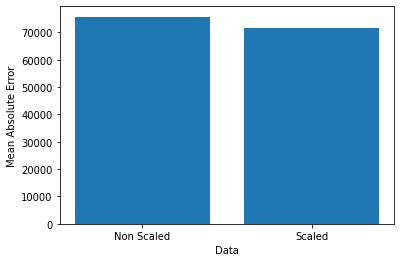

In [ ]:
plt.bar(name_lr,mean_list_lr)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
import pickle

# Dump the trained LR Model with Pickle
LR_pkl_filename = '/content/gdrive/MyDrive/CROP_YIELD_PREDICT_MODEL/LR.pkl'
# Open the file to save as pkl file
LR_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(reg_model_scaled, LR_pkl)
# Close the pickle instances
LR_pkl.close()

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 11)

In [ ]:
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [ ]:
r2_score(y_test,rf_pred)

0.9497398516173593

In [ ]:
mae_rf = mean_absolute_error(y_test, rf_pred)

Let us check the Errors

In [ ]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,rf_pred))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,rf_pred))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Mean Absolute Error is: 7185.482127185796
Mean Squared Error is: 5741989494.064628
Root Mean Squared Error is: 75775.91631953142


Text(0.5, 1.0, 'Random Forest Regression')

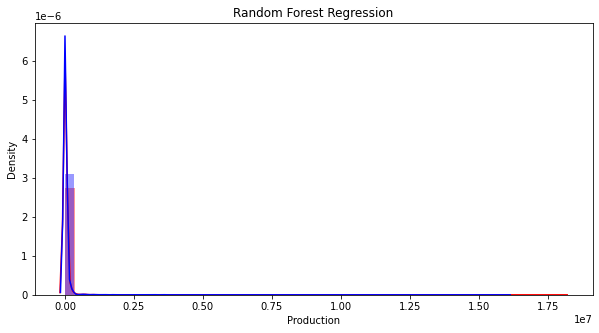

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.distplot(y_test, hist = True, color = "r", label = "Actual value ")
sns.distplot(rf_pred, hist = True, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

Check the Mean Absolute error of unsclaed and scaled predicted test data

In [ ]:
mean_list_rf = [mae_rf]
name_rf = ['Non Scaled']

Text(0, 0.5, 'Mean Absolute Error')

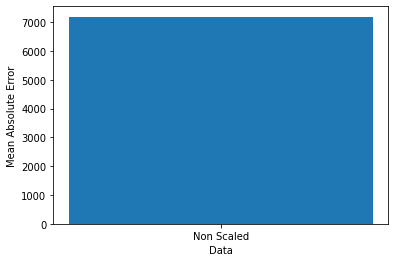

In [ ]:
plt.bar(name_rf,mean_list_rf)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Hyperparameter tuning using GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
para_grid = {
    'n_estimators' : [20, 50, 100], 
}
cv_rf = GridSearchCV(estimator = rf_model, param_grid = para_grid, cv = 3)
cv_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=11),
             param_grid={'n_estimators': [20, 50, 100]})

In [ ]:
rf_pred_1 = cv_rf.predict(x_test)
mae_rf_1 = mean_absolute_error(y_test, rf_pred_1)

In [ ]:
r2_rf = r2_score(y_test,rf_pred_1)

In [ ]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,rf_pred_1))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,rf_pred_1))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,rf_pred_1)))


Mean Absolute Error is: 6872.579233414568
Mean Squared Error is: 5501739398.904365
Root Mean Squared Error is: 74173.71096894347


In [ ]:
mean_list_rf_1 = [mae_rf_1]
name_rf_1 = ['Non Scaled']

Text(0, 0.5, 'Mean Absolute Error')

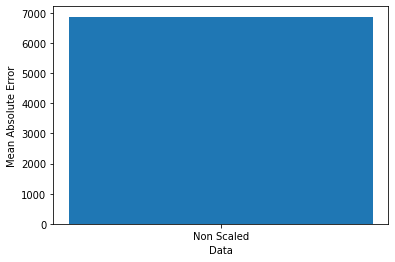

In [ ]:
plt.bar(name_rf_1,mean_list_rf_1)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# Dump the trained Random Forest Model with Pickle
RF_pkl_filename = '/content/gdrive/MyDrive/CROP_YIELD_PREDICT_MODEL/RF.pkl'
# Open the file to save as pkl file
RF_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(cv_rf, RF_pkl)
# Close the pickle instances
RF_pkl.close()

**Decision Tree**

In [ ]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 5)
dt_model.fit(x_train,y_train)

# Predicting results
dt_pred = dt_model.predict(x_test)

In [ ]:
r2_score(y_test,dt_pred)

0.9678345004209005

Text(0.5, 1.0, 'Decision Tree Regression')

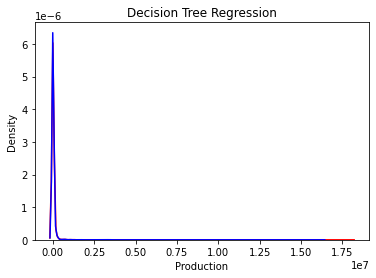

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(dt_pred, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

In [ ]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,dt_pred))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,dt_pred))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

Mean Absolute Error is: 7870.206423920854
Mean Squared Error is: 3674759557.978558
Root Mean Squared Error is: 60619.795100103715


In [ ]:
mae_dt = mean_absolute_error(y_test, dt_pred)

Text(0, 0.5, 'Mean Absolute Error')

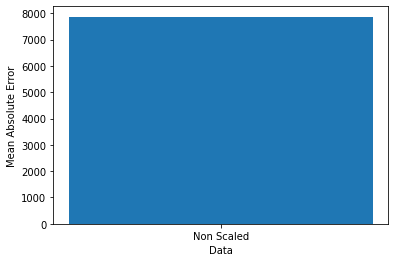

In [ ]:
mean_list_dt = [mae_dt]
name_dt = ['Non Scaled']

plt.bar(name_dt,mean_list_dt)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Hyper parameter tuning

In [ ]:
gs = GridSearchCV(dt_model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
10345380502.808697


In [ ]:
new_dt = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=10)

new_dt.fit(x_train, y_train)

# Predicting results
new_dt_pred = new_dt.predict(x_test)

In [ ]:
r2_dt = r2_score(y_test,new_dt_pred)


In [ ]:

print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,new_dt_pred))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,new_dt_pred))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,new_dt_pred)))


Mean Absolute Error is: 9412.44089902998
Mean Squared Error is: 4132091965.7754006
Root Mean Squared Error is: 64281.350061860096


Text(0, 0.5, 'Mean Absolute Error')

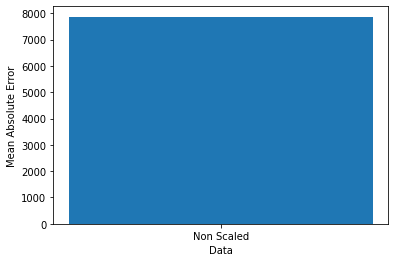

In [ ]:
mae_new_dt = mean_absolute_error(y_test, new_dt_pred)

mean_new_list_dt = [mae_new_dt]
name_new_dt = ['Non Scaled']

plt.bar(name_dt,mean_list_dt)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# Dump the trained Decision Tree Model with Pickle
DT_pkl_filename = '/content/gdrive/MyDrive/CROP_YIELD_PREDICT_MODEL/DT.pkl'
# Open the file to save as pkl file
DT_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt_model, DT_pkl)
# Close the pickle instances
DT_pkl.close()

**Neural Network**

In [ ]:
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


In [ ]:
sgd = optimizers.SGD(lr=0.1, clipnorm = 1, nesterov = True)
sgd_model = Sequential()
sgd_model.add(Dense(256, input_dim = 95, activation='relu'))
sgd_model.add(Dropout(0.2))
sgd_model.add(Dense(128, activation='relu'))
sgd_model.add(Dense(1, activation='relu'))
sgd_model.compile(loss='mean_absolute_error', optimizer='nadam')

In [ ]:
sgd_model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38294.9141
Epoch 2/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38233.8242
Epoch 3/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38155.5156
Epoch 4/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38193.1328
Epoch 5/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38172.0703
Epoch 6/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38157.9180
Epoch 7/50
1585/1585 [==============================] - 3s 2ms/step - loss: 38182.0039
Epoch 8/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38127.2344
Epoch 9/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38131.4922
Epoch 10/50
1585/1585 [==============================] - 4s 2ms/step - loss: 38107.3555
Epoch 11/50
1585/1585 [==============================] - 3s 2ms/step - loss: 38099.2227
Epoch 12/50
1585/1585 [==================

In [ ]:
nn_pred = sgd_model.predict(x_test)

In [ ]:
r2_score(y_test,nn_pred)

0.03565618327800735

In [ ]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test,nn_pred))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test,nn_pred))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test,nn_pred)))

Mean Absolute Error is: 29405.67023251339
Mean Squared Error is: 110171820865.46272
Root Mean Squared Error is: 331921.40766371595


In [ ]:
sgd_model.fit(x_train_scaled, y_train_scaled, epochs=50, batch_size=10)

Epoch 1/50
1585/1585 [==============================] - 5s 3ms/step - loss: 4.1534
Epoch 2/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.2481
Epoch 3/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 4/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0497
Epoch 5/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 6/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 7/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 8/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 9/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 10/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 11/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 12/50
1585/1585 [==============================] - 4s 3ms/step - loss: 0.0024
E

In [ ]:
nn_pred_scaled = sgd_model.predict(x_test_scaled)

In [ ]:
r2_nn = r2_score(y_test_scaled,nn_pred_scaled)

In [ ]:

print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test_scaled,nn_pred_scaled))
print("Mean Squared Error is:",metrics.mean_squared_error(y_test_scaled,nn_pred_scaled))
print("Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test_scaled,nn_pred_scaled)))

Mean Absolute Error is: 0.001878513448638287
Mean Squared Error is: 0.00035506421165222546
Root Mean Squared Error is: 0.018843147604692415


In [ ]:
mae_nn = mean_absolute_error(y_test, nn_pred)
mae_nn_scaled = mean_absolute_error(y_test_scaled, nn_pred_scaled)

Text(0, 0.5, 'Mean Absolute Error')

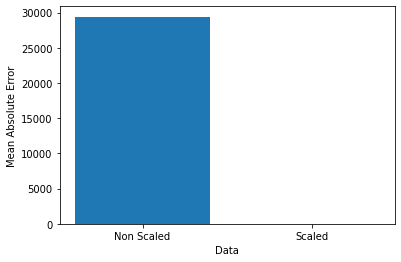

In [ ]:
mean_list_nn = [mae_nn, mae_nn_scaled]
name_nn = ['Non Scaled', 'Scaled']

plt.bar(name_nn,mean_list_nn)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# Dump the trained Decision Tree Model with Pickle
SGD_pkl_filename = '/content/gdrive/MyDrive/CROP_YIELD_PREDICT_MODEL/SGD.pkl'
# Open the file to save as pkl file
SGD_pkl = open(SGD_pkl_filename, 'wb')
pickle.dump(sgd_model, SGD_pkl)
# Close the pickle instances
SGD_pkl.close()

INFO:tensorflow:Assets written to: ram://b94fca01-1e3c-47f9-94a9-e5120fd38a79/assets


Compare the Mean Absolute Error values of all models to find the best one

Text(0, 0.5, 'Mean Absolute Error')

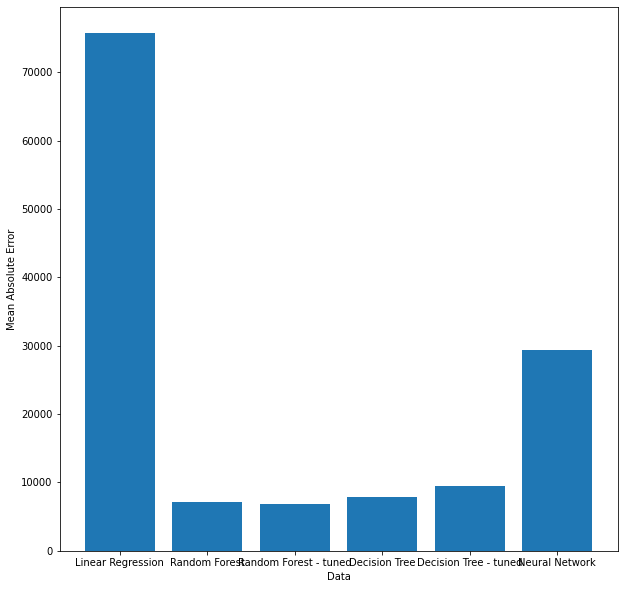

In [ ]:
#Unscaled
mean_list_all = [mae_lr, mae_rf, mae_rf_1, mae_dt, mae_new_dt, mae_nn]
name_all = ['Linear Regression', 'Random Forest', 'Random Forest - tuned', 'Decision Tree', 'Decision Tree - tuned', 'Neural Network']

plt.figure(figsize=(10, 10))
plt.bar(name_all,mean_list_all)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Mean Absolute Error')

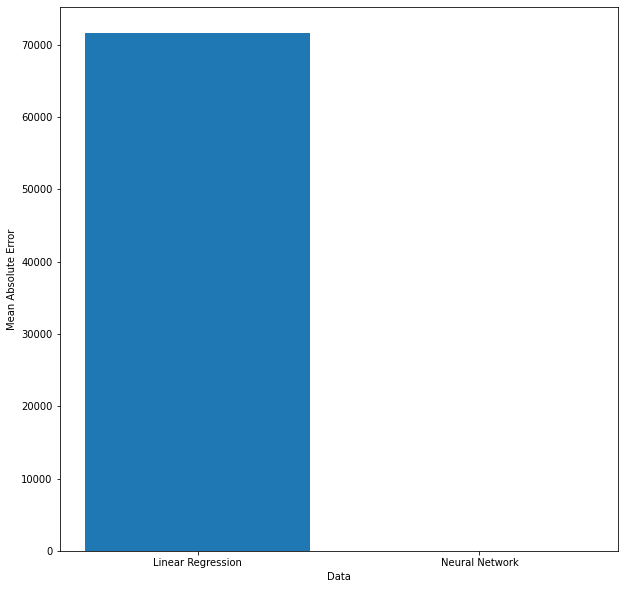

In [ ]:
#scaled
mean_list_all = [mae_lr_scaled, mae_nn_scaled]
name_all = ['Linear Regression', 'Neural Network']

plt.figure(figsize=(10, 10))
plt.bar(name_all,mean_list_all)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AttributeError: ignored

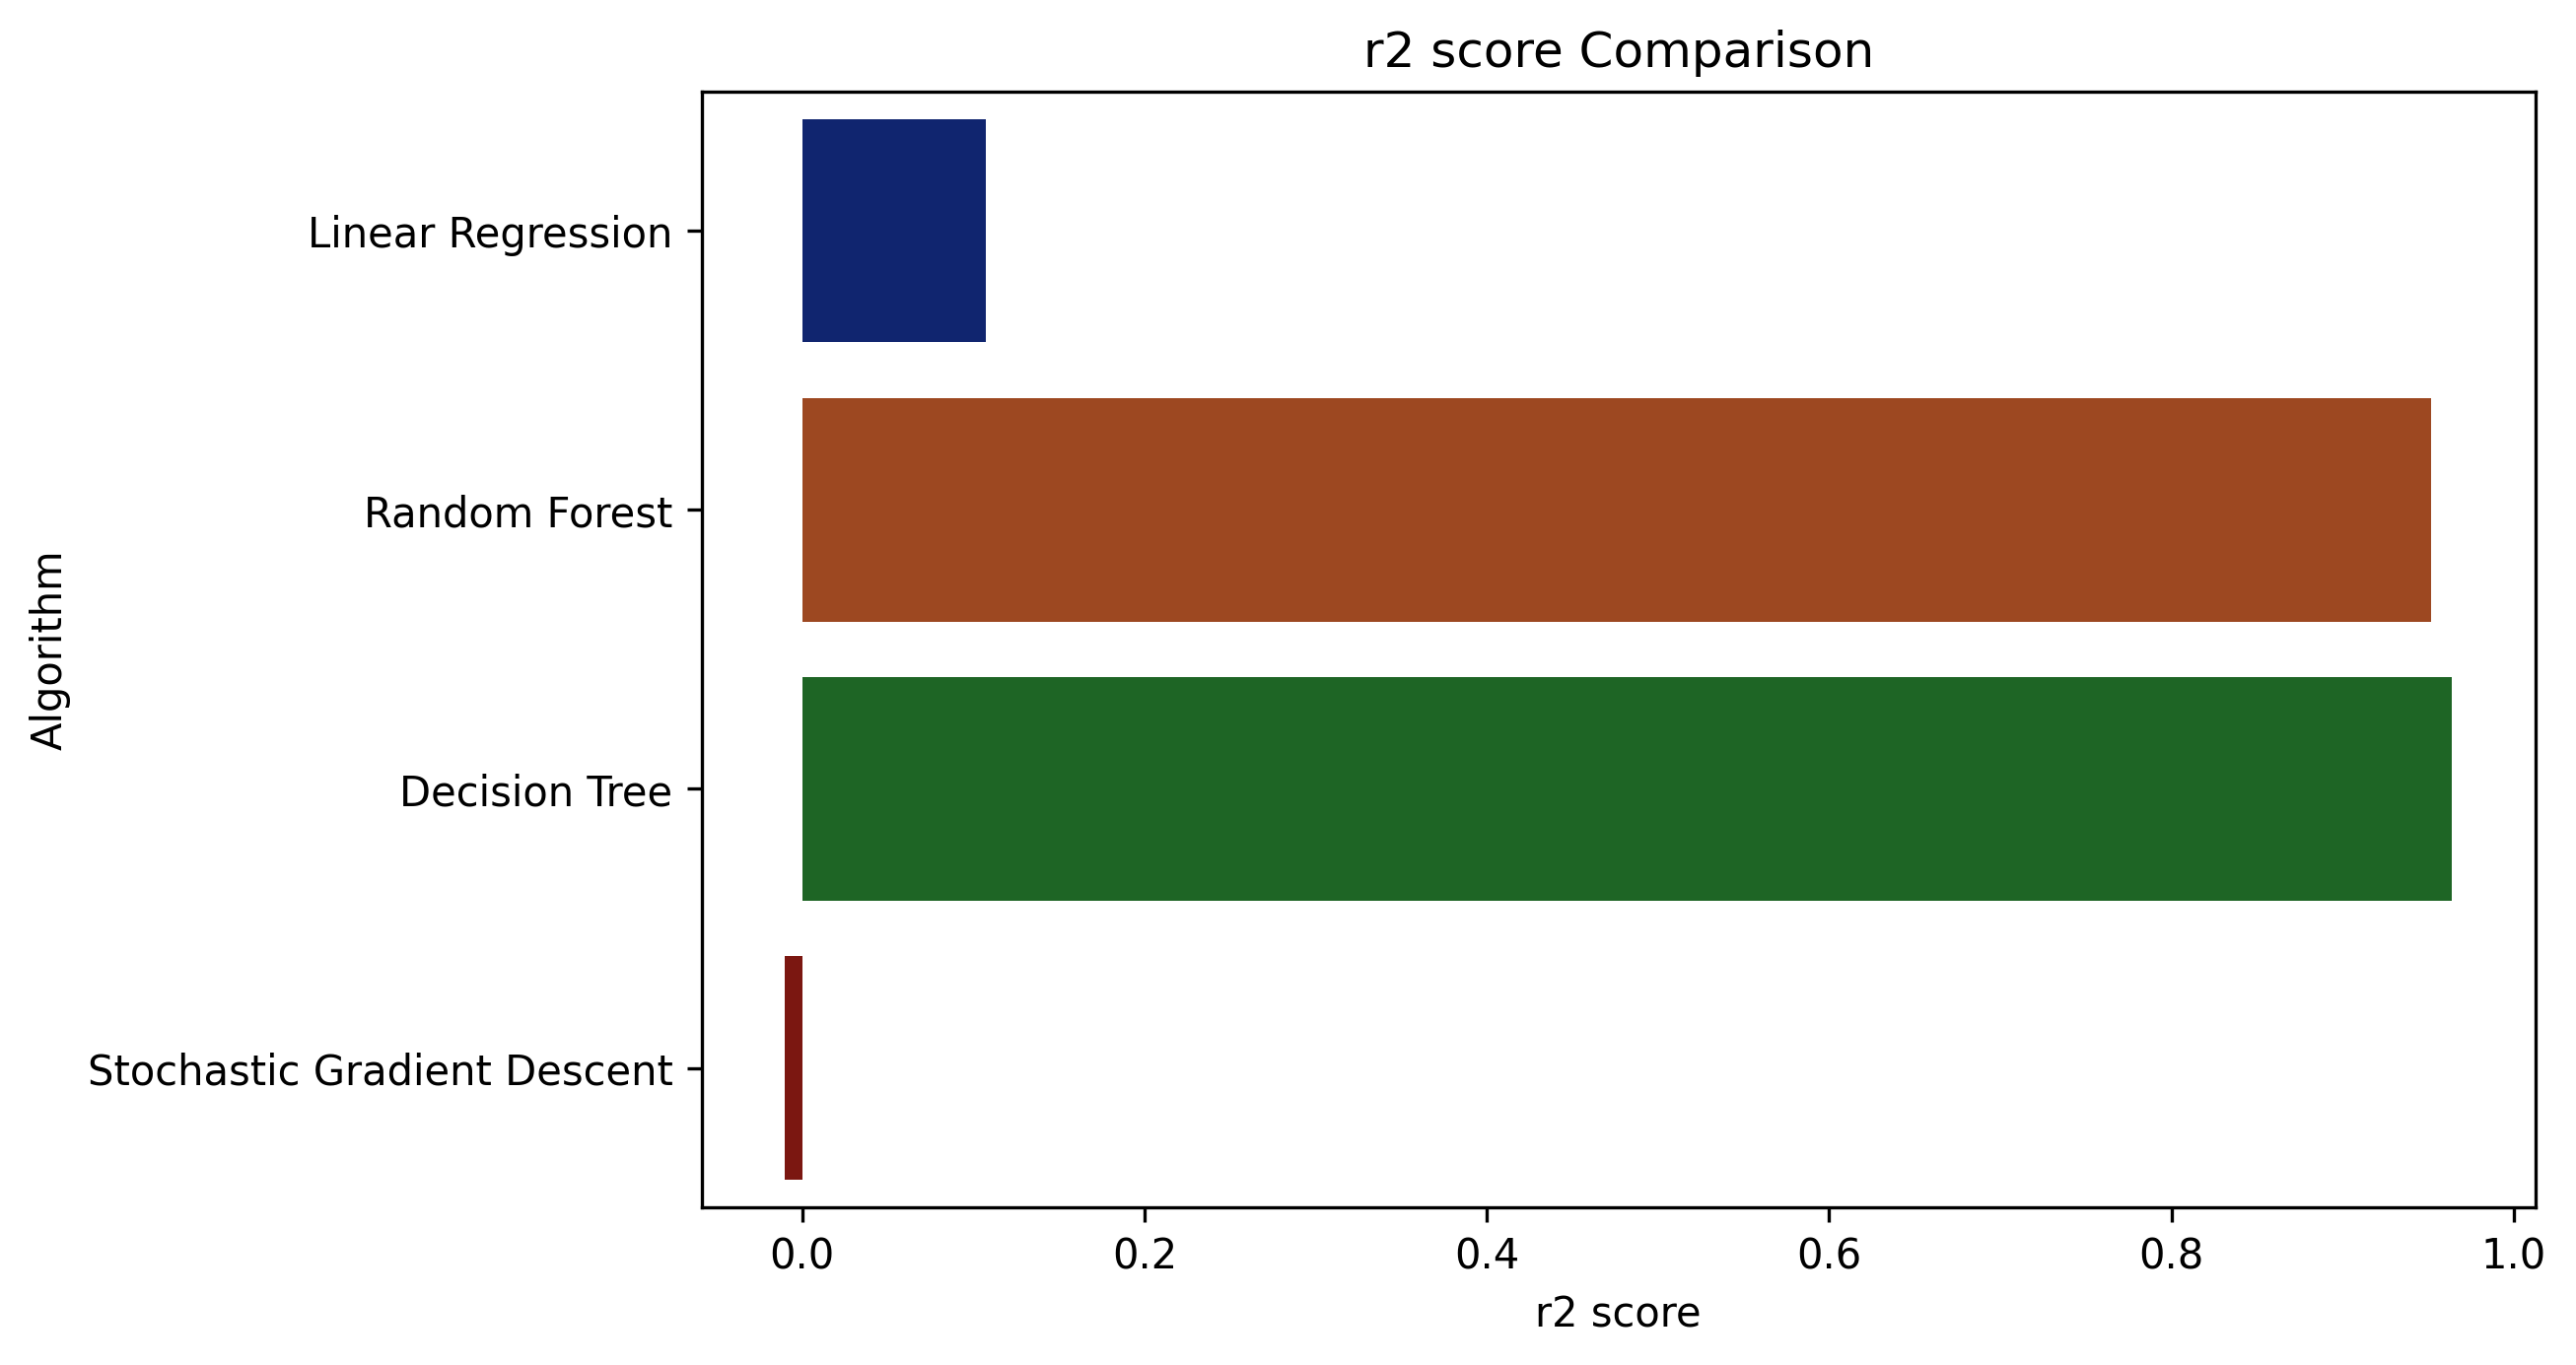

In [ ]:
R2 = [r2_lr, r2_rf, r2_dt, r2_nn]
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Stochastic Gradient Descent']

plt.figure(figsize=[8,5],dpi = 300)
plt.title('r2 score Comparison')
plt.xlabel('r2 score')
plt.ylabel('Algorithm')
ax = sns.barplot(x = R2, y = models, palette='dark')
#for i in ax.containers:
 #   ax.bar_label(i,)
ax.bar_label(ax.containers[0])

## **Random Forest Regressor with hyper paramenter tuning  is the best option**